Nesta aula, vamos aprender como trabalhar com ngramas e stopwords, utilizando a bilioteca NLTK.

# NGRAMAS, Stopwords e NLTK
### Autor: Lucas Ferro Antunes de Oliveira
#### HAILab - PPGTS - PUCPR

lucas.ferro.2000@hotmail.com

#Tokenização e normalização do corpus

In [ ]:
# prompt: converta um arquivo pdf em txt padrão utf-8

import PyPDF2
import re

def convert_pdf_to_txt(pdf_path, txt_path):
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            text = ''
            for page in pdf_reader.pages:
                text += page.extract_text()

            # Remove extra whitespace and newlines
            text = re.sub(r'\s+', ' ', text)

            with open(txt_path, 'w', encoding='utf-8') as txt_file:
                txt_file.write(text)

        print(f"PDF '{pdf_path}' converted to '{txt_path}' successfully.")
    except FileNotFoundError:
        print(f"Error: File '{pdf_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


# Example usage:
pdf_file_path = 'Livro/A-Revolução-dos-Bichos-George-Orwell.pdf'  # Replace with your PDF file path
txt_file_path = 'Livro/A-Revolução-dos-Bichos-George-Orwell.txt'  # Replace with desired output file path

convert_pdf_to_txt(pdf_file_path, txt_file_path)


PDF 'A-Revolução-dos-Bichos-George-Orwell.pdf' converted to 'A-Revolução-dos-Bichos-George-Orwell.txt' successfully.


In [2]:
import nltk

In [3]:
# Instalação do NLTK
# !pip install nltk==3.6.2

In [4]:
# Importação de bibliotecas
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from datetime import datetime
from collections import Counter
from nltk import ngrams
import string
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import re
import cmocean
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giova\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# pd.set_option('max_columns', None)
# pd.set_option('max_colwidth', None)

In [6]:
# Pega todas as pontuações
remove_pt = string.punctuation
remove_pt

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
# Baixa as stopwords para o português no NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_pt = set(stopwords.words('portuguese'))
len(stop_words_pt)
stop_words_pt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giova\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houverí

In [8]:
stop_words_pt.add('ser')
stop_words_pt.add('entao')
stop_words_pt.add('de')

stop_words_pt

{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entao',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',

In [9]:
stop_words_pt.add('ainda')
stop_words_pt.add('porém')
stop_words_pt

{'a',
 'ainda',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entao',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 '

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
PATH = 'capitulos/'

In [202]:
with open(PATH + 'section_11.txt', 'r', encoding='utf8') as f:
    filecontent = f.read()

print(filecontent[0:])

PosfácioRepensando A Revolução dos Bichos | Christopher Hitchens (2006) Certo dia no  nal da década de 1930, pouco depois de regressar da Guerra Civil Espanhola, George Orwell estava fazendo uma de suas longas caminhadas solitárias pelo interior da Inglaterra. Como haveria de recordar mais tarde: Pensei em denunciar o mito soviético numa história que fosse fácil de compreender por qualquer pessoa e fácil de traduzir para outras línguas. No entanto, os detalhes concretos da história só me ocorreriam depois, na época em que morava numa cidadezinha, no dia em que vi um menino de uns dez anos guiando por um caminho estreito um imenso cavalo de tiro que cobria de chicotadas cada vez que o animal tentava se desviar. Percebi então que, se aqueles animais adquirissem consciência de sua força, não teríamos o menor poder sobre eles, e que os animais são explorados pelos homens de modo muito semelhante à maneira como o proletariado é explorado pelos ricos. O conceito de “direitos dos animais” ain

In [203]:
type(filecontent)

str

In [204]:
len(filecontent) # número de tokens

51864

## Transformando o texto completo em sentenças (tokenizer do NLTK)

In [205]:
sentencas = []
for sentence in sent_tokenize(filecontent, language = 'portuguese'):
    sentencas.append(sentence)

In [206]:
sentencas

['PosfácioRepensando A Revolução dos Bichos | Christopher Hitchens (2006) Certo dia no \x00nal da década de 1930, pouco depois de regressar da Guerra Civil Espanhola, George Orwell estava fazendo uma de suas longas caminhadas solitárias pelo interior da Inglaterra.',
 'Como haveria de recordar mais tarde: Pensei em denunciar o mito soviético numa história que fosse fácil de compreender por qualquer pessoa e fácil de traduzir para outras línguas.',
 'No entanto, os detalhes concretos da história só me ocorreriam depois, na época em que morava numa cidadezinha, no dia em que vi um menino de uns dez anos guiando por um caminho estreito um imenso cavalo de tiro que cobria de chicotadas cada vez que o animal tentava se desviar.',
 'Percebi então que, se aqueles animais adquirissem consciência de sua força, não teríamos o menor poder sobre eles, e que os animais são explorados pelos homens de modo muito semelhante à maneira como o proletariado é explorado pelos ricos.',
 'O conceito de “dire

In [207]:
index = 1
for sentenca in sentencas[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {sentenca}')
    index+=1

1: PosfácioRepensando A Revolução dos Bichos | Christopher Hitchens (2006) Certo dia no  nal da década de 1930, pouco depois de regressar da Guerra Civil Espanhola, George Orwell estava fazendo uma de suas longas caminhadas solitárias pelo interior da Inglaterra.
2: Como haveria de recordar mais tarde: Pensei em denunciar o mito soviético numa história que fosse fácil de compreender por qualquer pessoa e fácil de traduzir para outras línguas.
3: No entanto, os detalhes concretos da história só me ocorreriam depois, na época em que morava numa cidadezinha, no dia em que vi um menino de uns dez anos guiando por um caminho estreito um imenso cavalo de tiro que cobria de chicotadas cada vez que o animal tentava se desviar.
4: Percebi então que, se aqueles animais adquirissem consciência de sua força, não teríamos o menor poder sobre eles, e que os animais são explorados pelos homens de modo muito semelhante à maneira como o proletariado é explorado pelos ricos.
5: O conceito de “direitos d

## Segmentação por quebra de linha e depois pelo tokenizer do NLTK

In [208]:
sentencas_linha = []
for sentence in filecontent.split('\n'):
    if sentence != '':
        for processed_sentence in sent_tokenize(sentence, language = 'portuguese'):
            sentencas_linha.append(processed_sentence)

In [209]:
index = 1
for sentenca in sentencas_linha[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {sentenca}')
    index+=1

1: PosfácioRepensando A Revolução dos Bichos | Christopher Hitchens (2006) Certo dia no  nal da década de 1930, pouco depois de regressar da Guerra Civil Espanhola, George Orwell estava fazendo uma de suas longas caminhadas solitárias pelo interior da Inglaterra.
2: Como haveria de recordar mais tarde: Pensei em denunciar o mito soviético numa história que fosse fácil de compreender por qualquer pessoa e fácil de traduzir para outras línguas.
3: No entanto, os detalhes concretos da história só me ocorreriam depois, na época em que morava numa cidadezinha, no dia em que vi um menino de uns dez anos guiando por um caminho estreito um imenso cavalo de tiro que cobria de chicotadas cada vez que o animal tentava se desviar.
4: Percebi então que, se aqueles animais adquirissem consciência de sua força, não teríamos o menor poder sobre eles, e que os animais são explorados pelos homens de modo muito semelhante à maneira como o proletariado é explorado pelos ricos.
5: O conceito de “direitos d

## Tokenização de cada sentença em palavras (tokenizer do NLTK)





In [210]:
sentencas_tokenizadas = []

for sentenca in sentencas_linha:
    tokenized_sentence = word_tokenize(sentenca, language='portuguese')
    sentencas_tokenizadas.append(tokenized_sentence)
index = 1
for tokens in sentencas_tokenizadas[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {tokens}')
    index+=1

1: ['PosfácioRepensando', 'A', 'Revolução', 'dos', 'Bichos', '|', 'Christopher', 'Hitchens', '(', '2006', ')', 'Certo', 'dia', 'no', '\x00nal', 'da', 'década', 'de', '1930', ',', 'pouco', 'depois', 'de', 'regressar', 'da', 'Guerra', 'Civil', 'Espanhola', ',', 'George', 'Orwell', 'estava', 'fazendo', 'uma', 'de', 'suas', 'longas', 'caminhadas', 'solitárias', 'pelo', 'interior', 'da', 'Inglaterra', '.']
2: ['Como', 'haveria', 'de', 'recordar', 'mais', 'tarde', ':', 'Pensei', 'em', 'denunciar', 'o', 'mito', 'soviético', 'numa', 'história', 'que', 'fosse', 'fácil', 'de', 'compreender', 'por', 'qualquer', 'pessoa', 'e', 'fácil', 'de', 'traduzir', 'para', 'outras', 'línguas', '.']
3: ['No', 'entanto', ',', 'os', 'detalhes', 'concretos', 'da', 'história', 'só', 'me', 'ocorreriam', 'depois', ',', 'na', 'época', 'em', 'que', 'morava', 'numa', 'cidadezinha', ',', 'no', 'dia', 'em', 'que', 'vi', 'um', 'menino', 'de', 'uns', 'dez', 'anos', 'guiando', 'por', 'um', 'caminho', 'estreito', 'um', 'imen

## Pre-processamento dos elementos tokenizados
A ideia aqui é retirar todas as palavras que pertencem a lista de stopwords, deixar tudo em minúsculos, retirar espaços e quebras de linhas adicionais desnecessários.

In [211]:
from typing import TextIO
sent_tokenizada_preprocessed = []
for sent_tokenizada in sentencas_tokenizadas:
    raw = [token.lower() for token in sent_tokenizada]

    raw = [''.join(c for c in s if c not in remove_pt+'–'+'🙁'+'\’'+'\”'+"“") for s in raw]
    raw = [re.sub(r"\d+[.,]?\d*","", s) for s in raw]
    raw = [s for s in raw if s not in stop_words_pt] # stopwords
    raw = [' '.join(s.split()) for s in raw if s]
    string = ' '.join(raw).rstrip().lstrip()
    if string != '':
        sent_tokenizada_preprocessed.append(string)

index = 1
for texto in sent_tokenizada_preprocessed[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {texto}')
    index+=1


1: posfáciorepensando revolução bichos christopher hitchens certo dia  nal década pouco regressar guerra civil espanhola george orwell fazendo longas caminhadas solitárias interior inglaterra
2: haveria recordar tarde pensei denunciar mito soviético história fácil compreender qualquer pessoa fácil traduzir outras línguas
3: entanto detalhes concretos história ocorreriam época morava cidadezinha dia vi menino uns dez anos guiando caminho estreito imenso cavalo tiro cobria chicotadas cada vez animal tentava desviar
4: percebi então animais adquirissem consciência força menor poder sobre animais explorados homens modo semelhante maneira proletariado explorado ricos
5: conceito direitos animais existia época maneira orwell decidiu fazer uso antropomór co percepção
6: dessa vez animais iriam adquirir fala inteligência coragem derrubar seusexploradores humanos
7: tragédia escravidão nova impiedosa mãos semelhantes
8: todos animais proclamados iguais — acordo expressão desde então entrou voca

#NGramas

In [212]:
len(sent_tokenizada_preprocessed)

350

In [213]:
import os
ngram_value = 1
most_common_value = 100

ngram_counts = [list(ngrams(s.split(), ngram_value)) for s in sent_tokenizada_preprocessed]
flat_ngram_counts = [item for sublist in ngram_counts for item in sublist]
ngram_list = Counter(flat_ngram_counts)

common = ngram_list.most_common(most_common_value)

df_common = pd.DataFrame(common, columns = ['Ngram','Count'])
index = 1
for n_gram in ngram_counts[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {n_gram}')
    index+=1

1: [('posfáciorepensando',), ('revolução',), ('bichos',), ('christopher',), ('hitchens',), ('certo',), ('dia',), ('\x00nal',), ('década',), ('pouco',), ('regressar',), ('guerra',), ('civil',), ('espanhola',), ('george',), ('orwell',), ('fazendo',), ('longas',), ('caminhadas',), ('solitárias',), ('interior',), ('inglaterra',)]
2: [('haveria',), ('recordar',), ('tarde',), ('pensei',), ('denunciar',), ('mito',), ('soviético',), ('história',), ('fácil',), ('compreender',), ('qualquer',), ('pessoa',), ('fácil',), ('traduzir',), ('outras',), ('línguas',)]
3: [('entanto',), ('detalhes',), ('concretos',), ('história',), ('ocorreriam',), ('época',), ('morava',), ('cidadezinha',), ('dia',), ('vi',), ('menino',), ('uns',), ('dez',), ('anos',), ('guiando',), ('caminho',), ('estreito',), ('imenso',), ('cavalo',), ('tiro',), ('cobria',), ('chicotadas',), ('cada',), ('vez',), ('animal',), ('tentava',), ('desviar',)]
4: [('percebi',), ('então',), ('animais',), ('adquirissem',), ('consciência',), ('for

In [214]:
index = 1
for n_gram in flat_ngram_counts[0:100]: # mostrando as 100 primeiras
    print(f'{index}: {n_gram}')
    index+=1

1: ('posfáciorepensando',)
2: ('revolução',)
3: ('bichos',)
4: ('christopher',)
5: ('hitchens',)
6: ('certo',)
7: ('dia',)
8: ('\x00nal',)
9: ('década',)
10: ('pouco',)
11: ('regressar',)
12: ('guerra',)
13: ('civil',)
14: ('espanhola',)
15: ('george',)
16: ('orwell',)
17: ('fazendo',)
18: ('longas',)
19: ('caminhadas',)
20: ('solitárias',)
21: ('interior',)
22: ('inglaterra',)
23: ('haveria',)
24: ('recordar',)
25: ('tarde',)
26: ('pensei',)
27: ('denunciar',)
28: ('mito',)
29: ('soviético',)
30: ('história',)
31: ('fácil',)
32: ('compreender',)
33: ('qualquer',)
34: ('pessoa',)
35: ('fácil',)
36: ('traduzir',)
37: ('outras',)
38: ('línguas',)
39: ('entanto',)
40: ('detalhes',)
41: ('concretos',)
42: ('história',)
43: ('ocorreriam',)
44: ('época',)
45: ('morava',)
46: ('cidadezinha',)
47: ('dia',)
48: ('vi',)
49: ('menino',)
50: ('uns',)
51: ('dez',)
52: ('anos',)
53: ('guiando',)
54: ('caminho',)
55: ('estreito',)
56: ('imenso',)
57: ('cavalo',)
58: ('tiro',)
59: ('cobria',)
60: ('ch

In [215]:
len(ngram_list)

2343

In [216]:
common

[(('livro',), 39),
 (('—',), 28),
 (('guerra',), 27),
 (('qualquer',), 27),
 (('orwell',), 25),
 (('liberdade',), 23),
 (('imprensa',), 20),
 (('anos',), 19),
 (('quase',), 19),
 (('pode',), 18),
 (('pessoas',), 18),
 (('revolução',), 17),
 (('bichos',), 17),
 (('quanto',), 17),
 (('história',), 16),
 (('sido',), 16),
 (('inglaterra',), 15),
 (('britânica',), 15),
 (('urss',), 15),
 (('pouco',), 14),
 (('animais',), 14),
 (('sobre',), 14),
 (('tempo',), 14),
 (('ter',), 14),
 (('todos',), 13),
 (('momento',), 13),
 (('espanha',), 13),
 (('stálin',), 13),
 (('soviético',), 12),
 (('muitos',), 12),
 (('país',), 12),
 (('tanto',), 12),
 (('fato',), 12),
 (('verdade',), 12),
 (('outro',), 11),
 (('assim',), 11),
 (('intelligentsia',), 11),
 (('mundo',), 11),
 (('coisa',), 11),
 (('porque',), 11),
 (('maneira',), 10),
 (('alguns',), 10),
 (('menos',), 10),
 (('rússia',), 10),
 (('socialista',), 10),
 (('edição',), 10),
 (('porcos',), 10),
 (('sempre',), 10),
 (('governo',), 10),
 (('censura

In [217]:
df_common.head(30)

,Ngram,Count
0,"(livro,)",39
1,"(—,)",28
2,"(guerra,)",27
3,"(qualquer,)",27
4,"(orwell,)",25
5,"(liberdade,)",23
6,"(imprensa,)",20
7,"(anos,)",19
8,"(quase,)",19
9,"(pode,)",18


In [218]:
# Quantidade de palavras
len(flat_ngram_counts)

4602

In [219]:
# Quantidade de palavras únicas
len(ngram_list)

2343

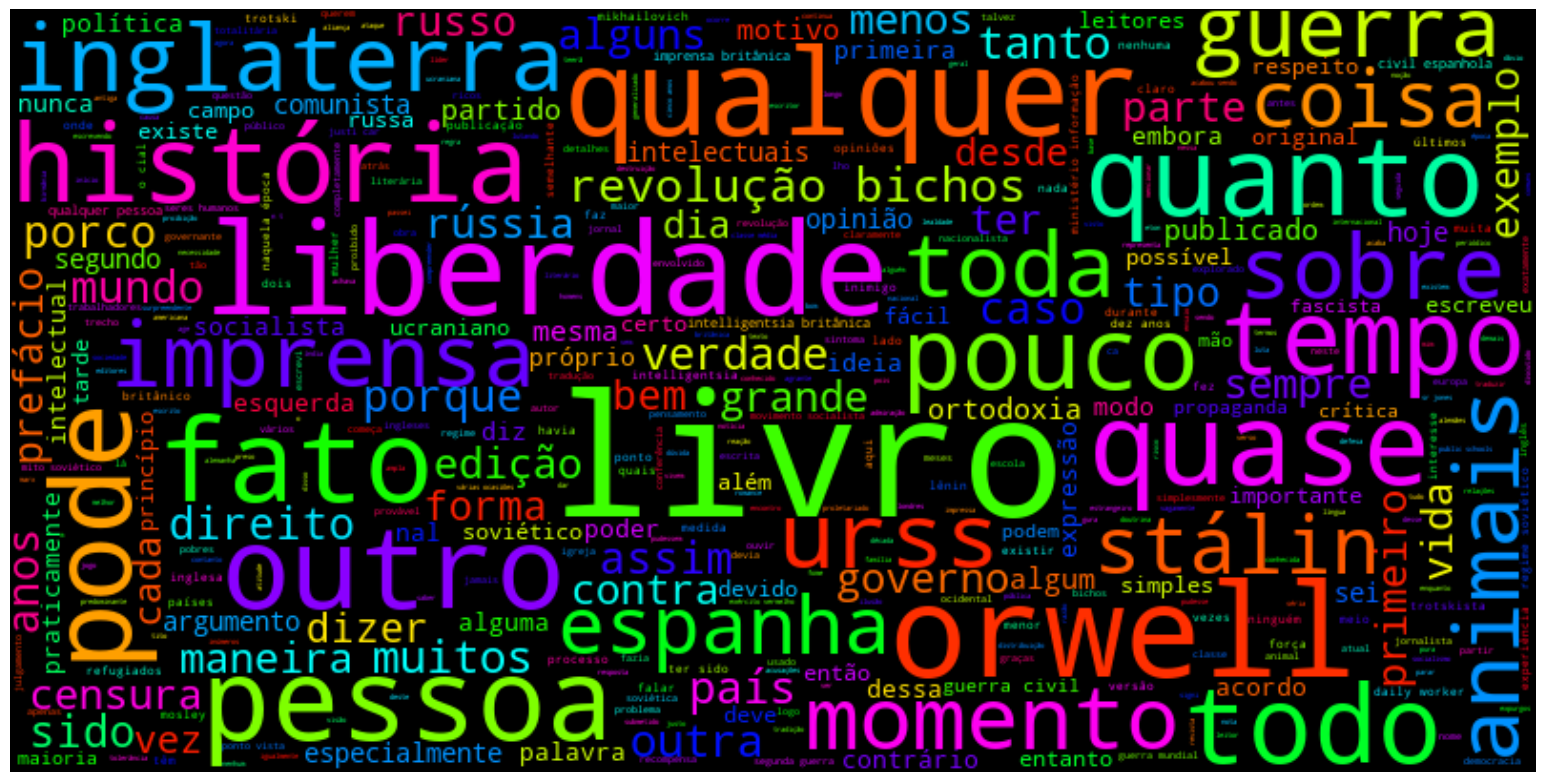

In [220]:
color = 'black'
height = 400
width = 800
max_words = 2000
colormap = 'hsv'
size_X = 50
size_Y = 50

str_text=" ".join(sent_tokenizada_preprocessed)


wordcloud = WordCloud(background_color = color, max_words = max_words, max_font_size = 90, colormap = colormap, height = height, width = width).generate(str_text)

X = size_X/2.54
Y = size_Y/2.25

fig = plt.figure(figsize = [X, Y])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.box(False)
plt.show()

fazer a frequencia, Carlos